In [184]:
from pygmo import *
import pygmo as pg
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt


In [195]:
population_size = 50
fitness_results = []
sphere_data = pd.read_csv("Data/sphere_data.csv")
sphere = sphere_data["val"].tolist()


In [189]:
class shifted_sphere:
    def __init__(self, dims):
        self.dims = dims
        
    def fitness(self, x):
        bias = -450.0
        F = np.sum(np.square(np.array(x) - np.array(sphere[:self.dims])))
        global fitness_results
        val = F + bias
        fitness_results.append(val)
        return [val, ]
   
    def get_bounds(self):
        return ([-100]*self.dims,[100]*self.dims)

In [190]:
def execute_pso_algorithm(dims):
    global fitness_results
    fitness_results = []
    pso_algorithm = None
    pso_problem = None
    if(dims == 50):
        pso_algorithm = algorithm(pso(gen = 3000,  omega=0.72, eta1=2.1, eta2=2.8))
        pso_algorithm.set_verbosity(50)
        pso_problem = pg.problem(shifted_sphere(50))
    elif(dims == 500):
        pso_algorithm = algorithm(pso(gen=3000, omega= .7, eta1=0.5, eta2=4, max_vel = .05, variant = 6, neighb_type = 2, 
              neighb_param = 4, memory=False))
        pso_algorithm.set_verbosity(500)
        pso_problem = pg.problem(shifted_sphere(500))
    else : 
        return "Provide correct dimensions"
        
    pso_population = population(pso_problem, population_size)
    start_time = time.time()
    pso_population_result = pso_algorithm.evolve(pso_population)
    ended_time = time.time()
    completed_time = ended_time - start_time
    print(pso_population_result)
    print("\nComputational time:", round(completed_time, 2), "seconds\n")


Problem name: <class '__main__.shifted_sphere'>
	C++ class name: class pybind11::object

	Global dimension:			50
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-100, -100, -100, -100, -100, ... ]
	Upper bounds: [100, 100, 100, 100, 100, ... ]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 150050

	Thread safety: none

Population size: 50

List of individuals: 
#0:
	ID:			12995124856085578987
	Decision vector:	[97.3404, 76.9075, -18.4304, 25.4896, -23.2841, ... ]
	Fitness vector:		[-446.987]
#1:
	ID:			255735998838040899
	Decision vector:	[97.3414, 77.1374, -18.4159, 25.3466, -23.2841, ... ]
	Fitness vector:		[-447.145]
#2:
	ID:			10033484620210173862
	Decision vector:	[97.3412, 76.9517, -18.4133, 25.3831, -23.2839, ... ]
	Fitness v

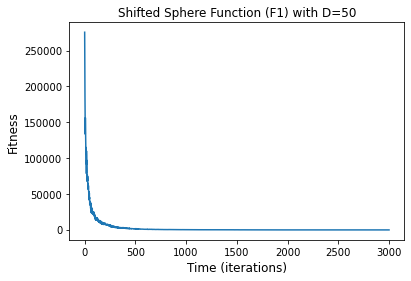

In [196]:
execute_pso_algorithm(50)
fitness_values = np.array([np.max(np.array(fitness_results[i:i+population_size]) * -1) for i in range(0, len(fitness_results), population_size)]) * -1
plt.plot(fitness_values)
plt.title("Shifted Sphere Function (F1) with D=50", fontsize=12)
plt.xlabel("Time (iterations)", fontsize=12)
plt.ylabel("Fitness", fontsize=12)
plt.show()

Problem name: <class '__main__.shifted_sphere'>
	C++ class name: class pybind11::object

	Global dimension:			500
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-100, -100, -100, -100, -100, ... ]
	Upper bounds: [100, 100, 100, 100, 100, ... ]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 150050

	Thread safety: none

Population size: 50

List of individuals: 
#0:
	ID:			598930783937330902
	Decision vector:	[97.2675, 77.0667, -19.018, 25.399, -22.9851, ... ]
	Fitness vector:		[-449.298]
#1:
	ID:			1678179174501828112
	Decision vector:	[97.2702, 77.0827, -19.0233, 25.3934, -22.9832, ... ]
	Fitness vector:		[-449.302]
#2:
	ID:			10768693042962368743
	Decision vector:	[97.2678, 77.0778, -19.031, 25.4094, -22.9822, ... ]
	Fitness vect

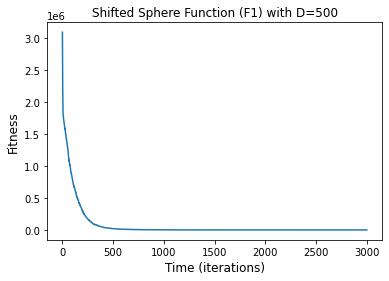

In [193]:
execute_pso_algorithm(500)
arr = np.array([np.max(np.array(fitness_results[i:i+population_size]) * -1) for i in range(0, len(fitness_results), population_size)]) * -1
plt.plot(arr)
plt.title("Shifted Sphere Function (F1) with D=500", fontsize=12)
plt.xlabel("Time (iterations)", fontsize=12)
plt.ylabel("Fitness", fontsize=12)
plt.show()